MALL VISITING CUSTOMERS CLUSTERING

Source : https://www.kaggle.com/code/muhammadbinali939/clustering-algorithm/input

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


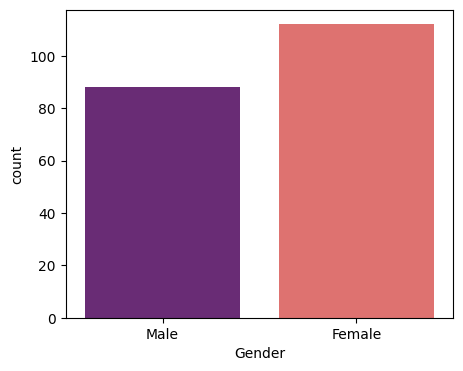

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x=df["Gender"], palette="magma")
plt.show()

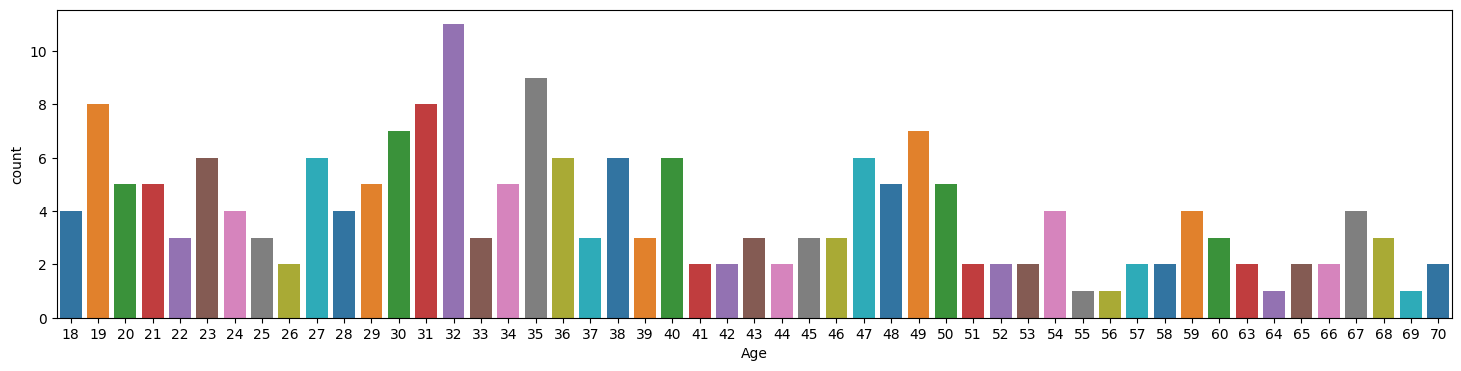

In [ ]:
# Age

fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x=df["Age"], palette="tab10")
plt.show()

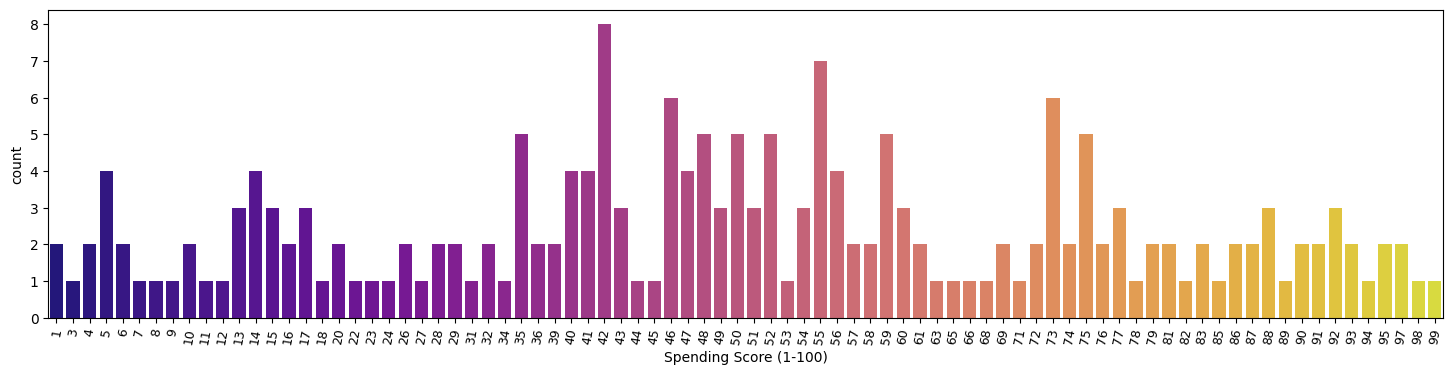

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(x=df["Spending Score (1-100)"], palette="plasma") #palette='viridis'
plt.xticks(rotation=80, fontsize = 9)
plt.show()

# **Data Cleansing**

In [ ]:
df=df.drop(['CustomerID'],axis=1)

In [ ]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df[df.duplicated()]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()
df.Gender=label.fit_transform(df.Gender)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
my_model=KMeans(n_clusters=3)

In [ ]:
labels=my_model.fit_predict(df)

In [ ]:
df['clusters']=my_model.labels_

In [ ]:
#clusters columns has been created
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1


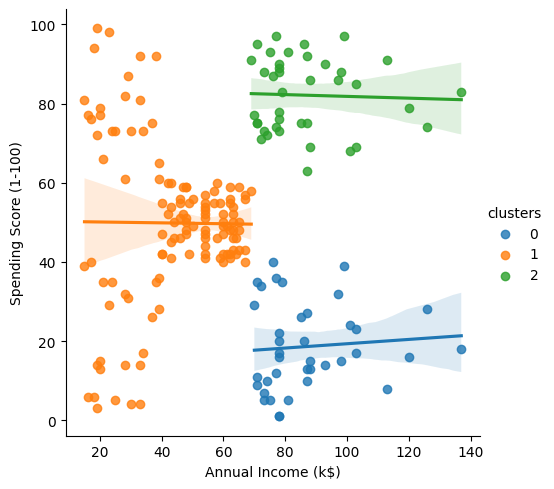

In [ ]:
sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='clusters');

In [ ]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


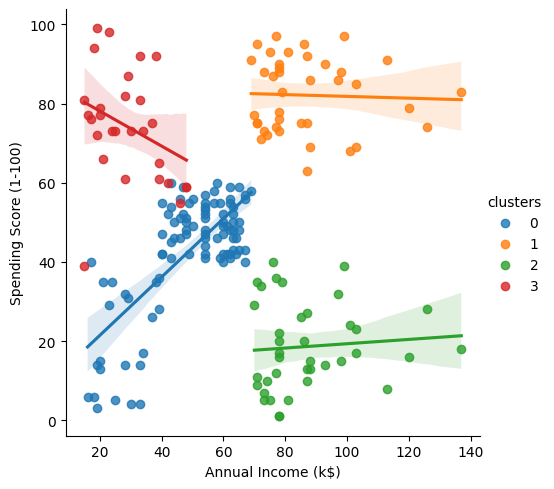

In [ ]:
my_model=KMeans(n_clusters=4)
labels=my_model.fit_predict(df)
df['clusters']=my_model.labels_

sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='clusters');

In [ ]:
print(labels)

[3 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)

In [ ]:
#with in a cluster sum of square
wcss

[309107.05500000005,
 213108.76112531964,
 143586.2265066983,
 104414.67534220168,
 75448.9836033379,
 58402.60752872858,
 51221.18301435406,
 44407.128189528186,
 40938.99511657932,
 37894.85132575757]

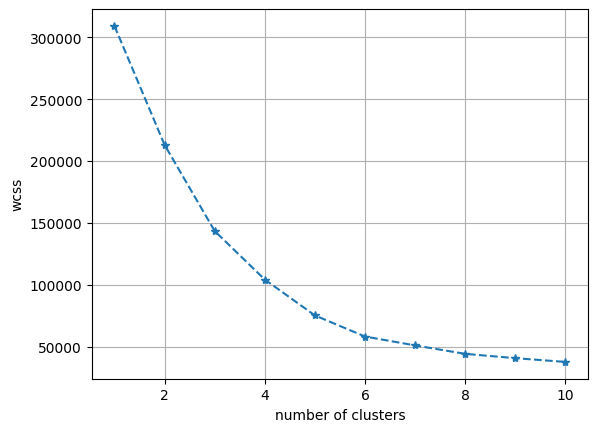

In [ ]:
#Elbow method
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(df)
    silhouette_avg = silhouette_score(df, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2929924981906485
For n_clusters = 3 The average silhouette_score is : 0.38374246298132575
For n_clusters = 4 The average silhouette_score is : 0.4062476494988772
For n_clusters = 5 The average silhouette_score is : 0.4442693222717166
For n_clusters = 6 The average silhouette_score is : 0.45198287442586393
For n_clusters = 7 The average silhouette_score is : 0.4393955688501853
For n_clusters = 8 The average silhouette_score is : 0.42749117017448396
For n_clusters = 9 The average silhouette_score is : 0.4107364812221607
For n_clusters = 10 The average silhouette_score is : 0.3830658071082359


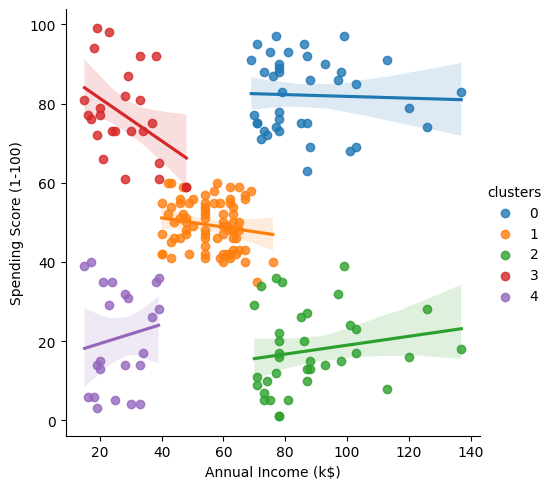

In [ ]:
my_model=KMeans(n_clusters=5)
labels=my_model.fit_predict(df)
df['clusters']=my_model.labels_

sns.lmplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='clusters');

In [ ]:
df["cluster"] = my_model.labels_
df.groupby("clusters").describe()

Gender                                                Age             \
          count      mean       std  min  25%  50%  75%  max count       mean   
clusters                                                                        
0          39.0  0.461538  0.505035  0.0  0.0  0.0  1.0  1.0  39.0  32.692308   
1          77.0  0.402597  0.493637  0.0  0.0  0.0  1.0  1.0  77.0  43.727273   
2          36.0  0.527778  0.506309  0.0  0.0  1.0  1.0  1.0  36.0  40.666667   
3          25.0  0.440000  0.506623  0.0  0.0  0.0  1.0  1.0  25.0  24.960000   
4          23.0  0.391304  0.499011  0.0  0.0  0.0  1.0  1.0  23.0  45.217391   

          ... Spending Score (1-100)       cluster                           \
          ...                    75%   max   count mean  std  min  25%  50%   
clusters  ...                                                                 
0         ...                   90.0  97.0    39.0  0.0  0.0  0.0  0.0  0.0   
1         ...                   55.0  60.0    77.0  1.0  0.0  1.0  1.0  1.0   
2         ...                   24.5  39.0    36.0  2.0  0.0  2.0  2.0  2.0   
3         ...                   82.0  99.0    25.0  3.0  0.0  3.0  3.0  3.0   
4         ...                   33.5  40.0    23.0  4.0  0.0  4.0  4.0  4.0   

                    
          75%  max  
clusters            
0         0.0  0.0  
1         1.0  1.0  
2         2.0  2.0  
3         3.0  3.0  
4         4.0  4.0  

[5 rows x 40 columns]

In [ ]:
# display summary statistic for each customer cluster
df.groupby("clusters")["Spending Score (1-100)"].describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,39.0,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
1,77.0,49.324675,6.131115,35.0,44.0,49.0,55.0,60.0
2,36.0,17.583333,10.204691,1.0,10.0,16.0,24.5,39.0
3,25.0,77.000000,11.803954,59.0,72.0,76.0,82.0,99.0
4,23.0,20.913043,13.017167,3.0,9.5,17.0,33.5,40.0


In [ ]:
print()

In [ ]:
# Kesimpulan
print("\nKesimpulan:")
print("Cluster 0:\n\nMemiliki rata-rata Spending Score yang sangat tinggi (82.13), dengan deviasi standar yang relatif rendah (9.36).\nSebagian besar data (75%) berada di atas nilai 74.5, dan nilai maksimumnya mencapai 97.0.\nPelanggan dalam cluster ini cenderung memiliki Spending Score yang sangat tinggi dan kurang bervariasi.\n\n\nCluster 1:\n\nMemiliki rata-rata Spending Score yang cukup tinggi (49.32), dengan deviasi standar yang relatif rendah (6.13).\nSebagian besar data (75%) berada di atas nilai 44.0, dan nilai maksimumnya mencapai 60.0.\nPelanggan dalam cluster ini cenderung memiliki Spending Score yang cukup tinggi dan kurang bervariasi.\n\n\nCluster 2:\n\nMemiliki rata-rata Spending Score yang rendah (17.58), dengan deviasi standar yang relatif tinggi (10.20).\nSebagian besar data (75%) berada di bawah nilai 24.5, dan nilai maksimumnya mencapai 39.0.\nPelanggan dalam cluster ini cenderung memiliki Spending Score yang rendah dan bervariasi.\n\n\nCluster 3:\n\nMemiliki rata-rata Spending Score yang tinggi (77.00), dengan deviasi standar yang cukup tinggi (11.80).\nSebagian besar data (75%) berada di atas nilai 72.0, dan nilai maksimumnya mencapai 99.0.\nPelanggan dalam cluster ini cenderung memiliki Spending Score yang tinggi dan bervariasi.\n\n\nCluster 4:\n\nMemiliki rata-rata Spending Score yang rendah (20.91), dengan deviasi standar yang tinggi (13.02).\nSebagian besar data (75%) berada di bawah nilai 33.5, dan nilai maksimumnya mencapai 40.0.\nPelanggan dalam cluster ini cenderung memiliki Spending Score yang rendah dan bervariasi.")


Kesimpulan:
Cluster 0:

Memiliki rata-rata Spending Score yang sangat tinggi (82.13), dengan deviasi standar yang relatif rendah (9.36).
Sebagian besar data (75%) berada di atas nilai 74.5, dan nilai maksimumnya mencapai 97.0.
Pelanggan dalam cluster ini cenderung memiliki Spending Score yang sangat tinggi dan kurang bervariasi.


Cluster 1:

Memiliki rata-rata Spending Score yang cukup tinggi (49.32), dengan deviasi standar yang relatif rendah (6.13).
Sebagian besar data (75%) berada di atas nilai 44.0, dan nilai maksimumnya mencapai 60.0.
Pelanggan dalam cluster ini cenderung memiliki Spending Score yang cukup tinggi dan kurang bervariasi.


Cluster 2:

Memiliki rata-rata Spending Score yang rendah (17.58), dengan deviasi standar yang relatif tinggi (10.20).
Sebagian besar data (75%) berada di bawah nilai 24.5, dan nilai maksimumnya mencapai 39.0.
Pelanggan dalam cluster ini cenderung memiliki Spending Score yang rendah dan bervariasi.


Cluster 3:

Memiliki rata-rata Spending Score